## 02_EDA

In [1]:
import pandas as pd
from lib import personalised_graphics, transformations

steam_games = pd.read_csv("data/steam_games.csv", index_col=0)
steam_games.dropna(inplace=True)
steam_games['genres'] = steam_games['genres'].apply(eval)
steam_games

,game_id,date,title,price,developer,genres,url,score,playtime_forever,playtime_2weeks,downloads
15,327950.0,1989-01-01,Sword of the Samurai,6.99,"MicroProse Software, Inc","[Adventure, Simulation, Retro, Classic, Strategy]",http://store.steampowered.com/app/327950/Sword...,1.460000,5084.0,9.0,54.0
24,32340.0,1990-01-01,LOOM™,5.99,LucasArts,"[Adventure, Point & Click, Classic, Fantasy, P...",http://store.steampowered.com/app/32340/LOOM/,2.000000,4349.0,0.0,146.0
31,9180.0,1990-12-14,Commander Keen,4.99,id Software,"[Platformer, Classic, Action, 2D, Retro, 1990'...",http://store.steampowered.com/app/9180/Command...,2.000000,18718.0,41.0,848.0
44,358260.0,1991-10-23,Crystal Caves,4.99,3D Realms (Apogee Software),"[Action, Classic, Platformer, 1990's]",http://store.steampowered.com/app/358260/Cryst...,2.000000,733.0,0.0,177.0
49,283920.0,1992-01-01,Putt-Putt® Joins the Parade,6.99,Humongous Entertainment,"[Adventure, Point & Click, Family Friendly, Ca...",http://store.steampowered.com/app/283920/PuttP...,1.580000,2524.0,3.0,116.0
...,...,...,...,...,...,...,...,...,...,...,...
26881,335430.0,2017-10-26,Grimoire: Manastorm,0.00,Omniconnection,"[Action, Indie, Shooter, Free to Play, Multipl...",http://store.steampowered.com/app/335430/Grimo...,2.120000,47572.0,401.0,732.0
27012,355180.0,2017-10-31,Codename CURE,0.00,Hoobalugalar_X,"[Free to Play, Zombies, Multiplayer, Survival,...",http://store.steampowered.com/app/355180/Coden...,1.094615,305778.0,8385.0,3901.0
27103,250620.0,2017-11-02,Among the Sleep - Enhanced Edition,16.99,Krillbite Studio,"[Horror, Indie, Adventure, Atmospheric, First-...",http://store.steampowered.com/app/250620/Among...,2.031111,46135.0,138.0,389.0
28306,285900.0,2017-12-12,Gang Beasts,19.99,Boneloaf,"[Funny, Multiplayer, Fighting, Local Multiplay...",http://store.steampowered.com/app/285900/Gang_...,1.132308,497569.0,14709.0,1476.0


##### date

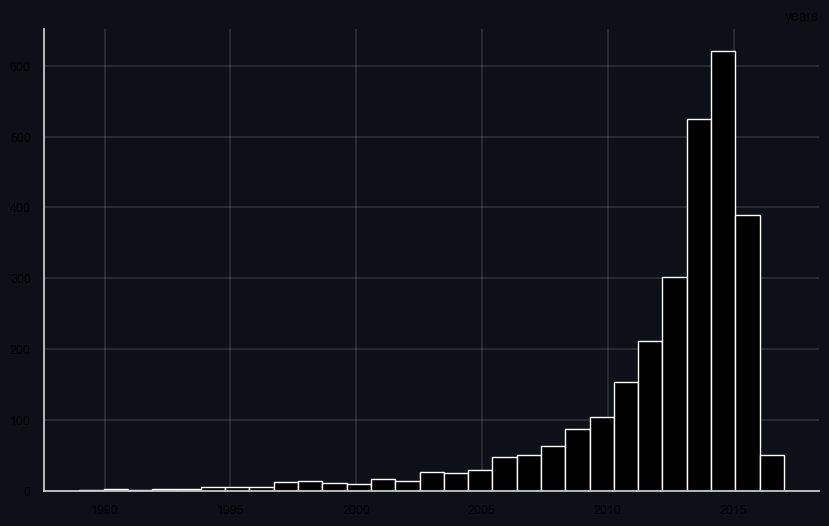

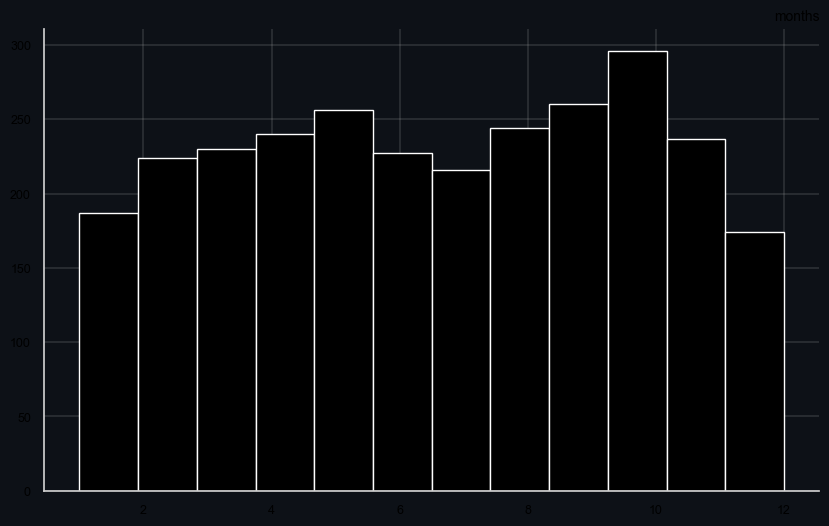

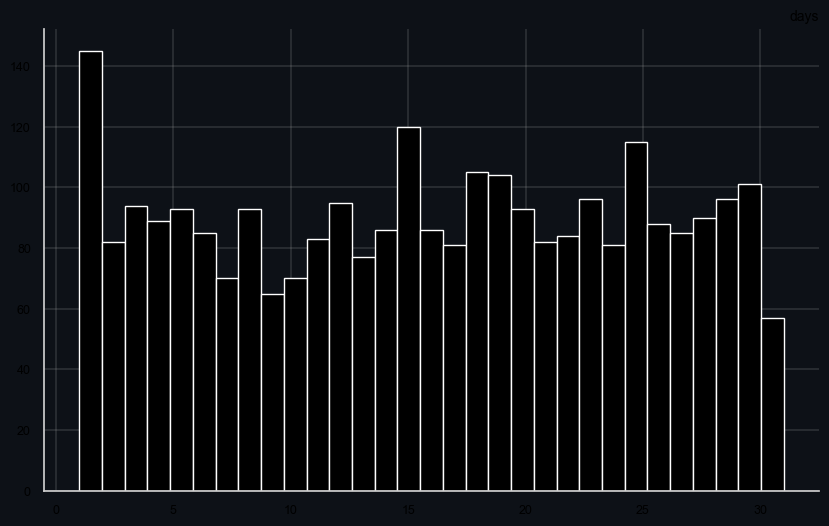

In [2]:
steam_games['date'] = pd.to_datetime(steam_games['date'])
personalised_graphics.histogram(steam_games["date"].dt.year, "years")
personalised_graphics.histogram(steam_games["date"].dt.month, "months")
personalised_graphics.histogram(steam_games["date"].dt.day, "days")

##### title

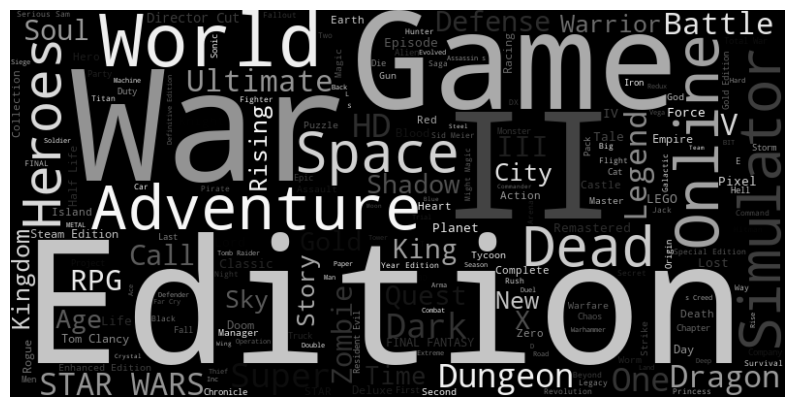

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convierte la lista de títulos en un solo texto separado por espacios
text = " ".join(steam_games["title"])

# Crea un objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='gray', contour_color='white').generate(text)

# Muestra la nube de palabras en una figura
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Oculta los ejes
plt.show()

##### price

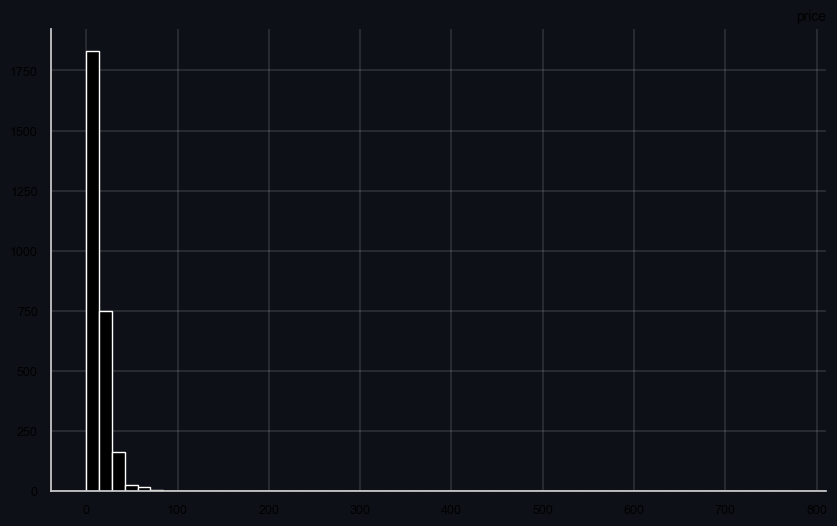

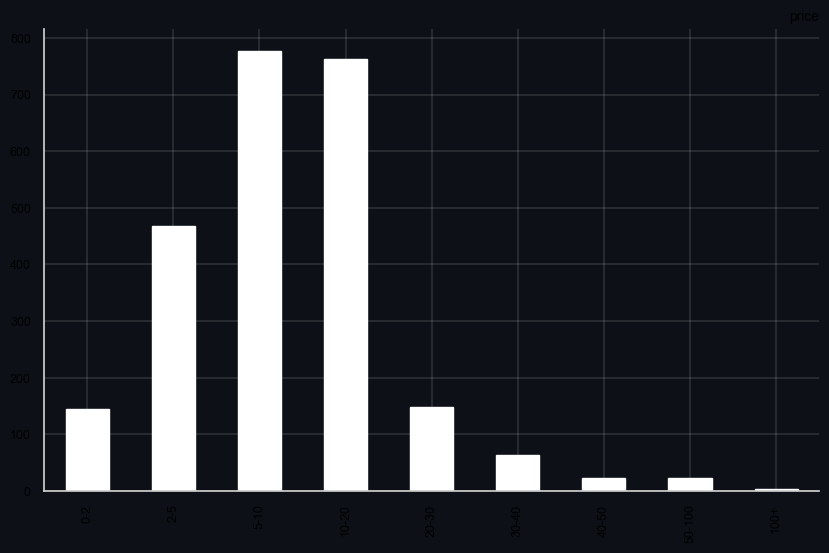

In [4]:
personalised_graphics.histogram(steam_games["price"], "price")

# Discretise price values
bins = [0, 2, 5, 10, 20, 30, 40, 50, 100, float('inf')]
labels = ["0-2", "2-5", "5-10", "10-20", "20-30", "30-40", "40-50", "50-100", "100+"]
steam_games['price_discr'] = pd.cut(steam_games['price'], bins=bins, labels=labels)

personalised_graphics.barplot(steam_games["price_discr"].value_counts().sort_index(), "price")

##### developer

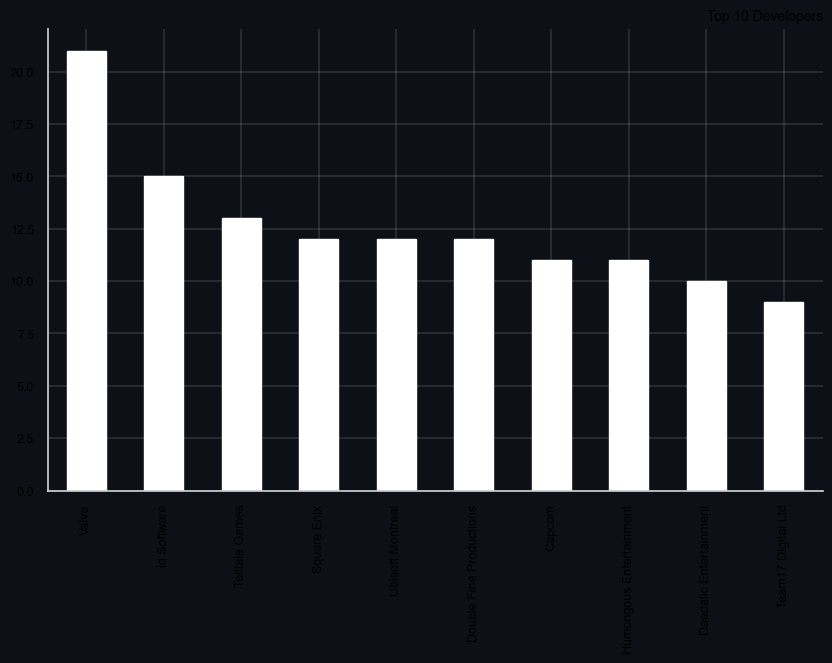

In [5]:
personalised_graphics.barplot(steam_games["developer"].value_counts().head(10), "Top 10 Developers")

##### genres

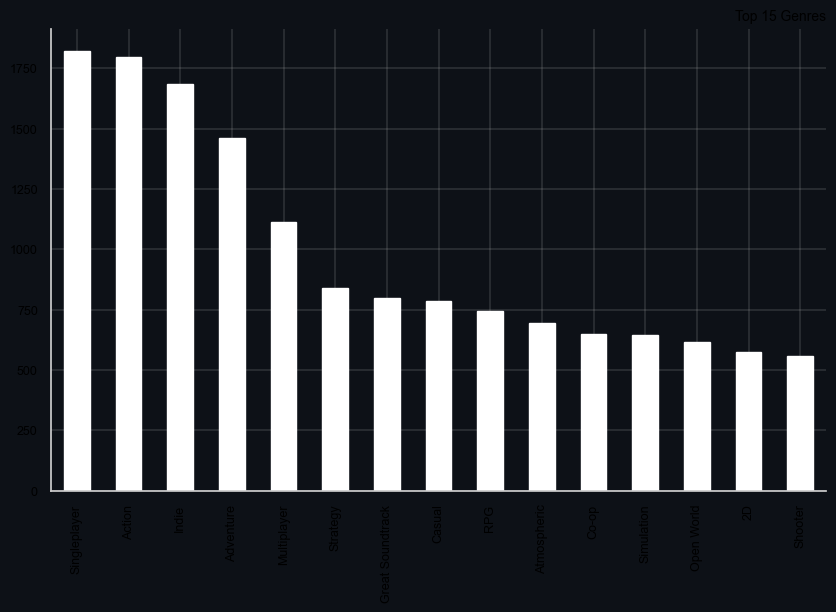

In [6]:
genres = steam_games[["genres"]]
genres = genres.dropna()
genres = genres.explode('genres')
personalised_graphics.barplot(genres["genres"].value_counts().head(15), "Top 15 Genres")

In [7]:
import pandas as pd

# Crea una copia del DataFrame original.
steam_games_copy = steam_games.copy()

# Para eliminar outliers en 'playtime_forever':
Q1 = steam_games_copy['playtime_forever'].quantile(0.25)
Q3 = steam_games_copy['playtime_forever'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
steam_games_copy = steam_games_copy[(steam_games_copy['playtime_forever'] >= lower_bound) & (steam_games_copy['playtime_forever'] <= upper_bound)]

# Para eliminar outliers en 'playtime_forever':
Q1 = steam_games_copy['playtime_2weeks'].quantile(0.25)
Q3 = steam_games_copy['playtime_2weeks'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
steam_games_copy = steam_games_copy[(steam_games_copy['playtime_2weeks'] >= lower_bound) & (steam_games_copy['playtime_2weeks'] <= upper_bound)]

# Para eliminar outliers en 'price':
Q1 = steam_games_copy['downloads'].quantile(0.25)
Q3 = steam_games_copy['downloads'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
steam_games_copy = steam_games_copy[(steam_games_copy['downloads'] >= lower_bound) & (steam_games_copy['downloads'] <= upper_bound)]

# Set a maximum price of 200 for games that originally cost more than 200
steam_games_copy['price'] = steam_games_copy['price'].apply(lambda x: 200 if x > 200 else x)

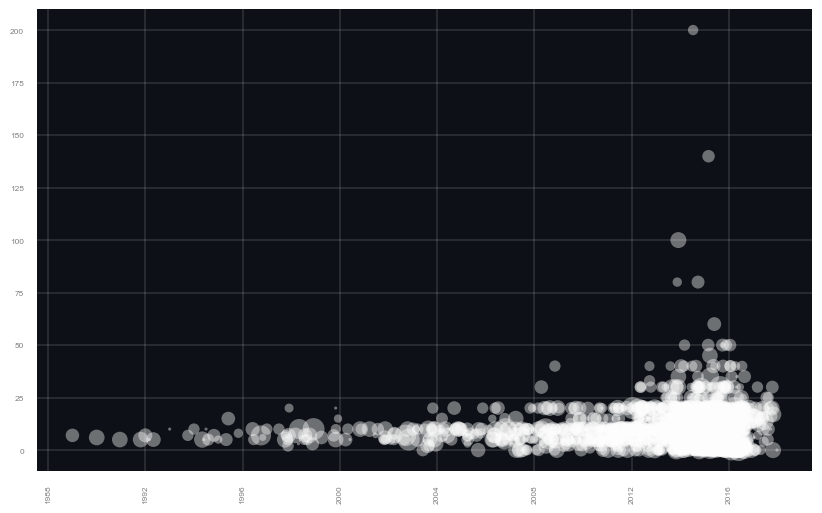

In [8]:
import seaborn as sns

red_color = "#E63946"
back_color = "#0D1117"

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.gca().set_facecolor(back_color)
sns.scatterplot(x='date', y='price', data=steam_games_copy, color="white", size="score", legend=False, edgecolor='none', alpha=0.4, sizes=(5,250))
#sns.scatterplot(x='date', y='price', data=edata_white, color=red_color, size='count', legend=False, edgecolor='none', alpha=0.4, sizes=(5,250))

plt.xlabel('')


plt.ylabel('')
#title = plt.title(f"{price}                ", loc='right')
#title.set_color(red_color)

# Quitar el borde de la grilla en los ejes
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.xticks(rotation=90)
plt.tick_params(axis='x', colors='grey')  
plt.tick_params(axis='y', colors='grey')  
plt.yticks(fontsize=6)
plt.xticks(fontsize=6)

# Cambia el color de la grilla de fondo a gris
ax.grid(color='darkgrey', linewidth=0.25)

# Guardar el gráfico como un archivo JPEG
plt.savefig(f"gallery/scatter_plot.jpg", format='jpg', dpi=300, bbox_inches='tight', facecolor=back_color)

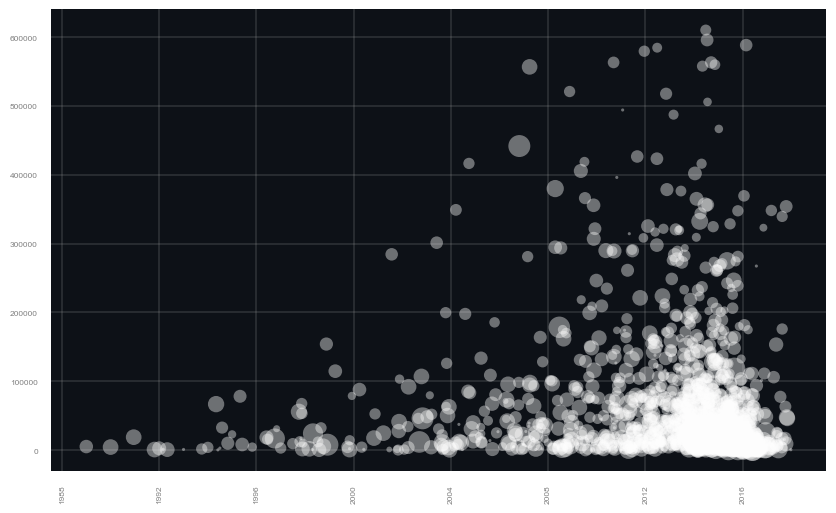

In [9]:
import seaborn as sns

red_color = "#E63946"
back_color = "#0D1117"

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.gca().set_facecolor(back_color)
sns.scatterplot(x='date', y='playtime_forever', data=steam_games_copy, color="white", size="score", legend=False, edgecolor='none', alpha=0.4, sizes=(5,250))
#sns.scatterplot(x='date', y='price', data=edata_white, color=red_color, size='count', legend=False, edgecolor='none', alpha=0.4, sizes=(5,250))

plt.xlabel('')


plt.ylabel('')
#title = plt.title(f"{price}                ", loc='right')
#title.set_color(red_color)

# Quitar el borde de la grilla en los ejes
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.xticks(rotation=90)
plt.tick_params(axis='x', colors='grey')  
plt.tick_params(axis='y', colors='grey')  
plt.yticks(fontsize=6)
plt.xticks(fontsize=6)

# Cambia el color de la grilla de fondo a gris
ax.grid(color='darkgrey', linewidth=0.25)

# Guardar el gráfico como un archivo JPEG
plt.savefig(f"gallery/scatter_plot.jpg", format='jpg', dpi=300, bbox_inches='tight', facecolor=back_color)

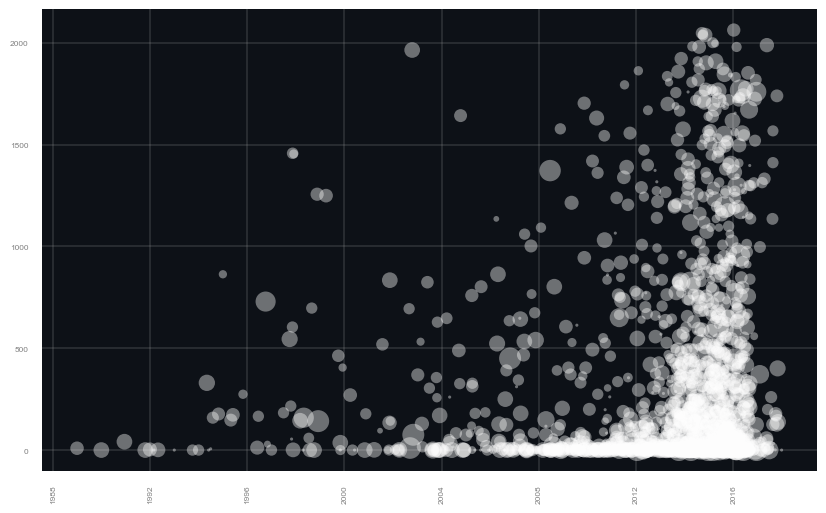

In [10]:
import seaborn as sns

red_color = "#E63946"
back_color = "#0D1117"

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.gca().set_facecolor(back_color)
sns.scatterplot(x='date', y='playtime_2weeks', data=steam_games_copy, color="white", size="score", legend=False, edgecolor='none', alpha=0.4, sizes=(5,250))
#sns.scatterplot(x='date', y='price', data=edata_white, color=red_color, size='count', legend=False, edgecolor='none', alpha=0.4, sizes=(5,250))

plt.xlabel('')


plt.ylabel('')
#title = plt.title(f"{price}                ", loc='right')
#title.set_color(red_color)

# Quitar el borde de la grilla en los ejes
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.xticks(rotation=90)
plt.tick_params(axis='x', colors='grey')  
plt.tick_params(axis='y', colors='grey')  
plt.yticks(fontsize=6)
plt.xticks(fontsize=6)

# Cambia el color de la grilla de fondo a gris
ax.grid(color='darkgrey', linewidth=0.25)

# Guardar el gráfico como un archivo JPEG
plt.savefig(f"gallery/scatter_plot.jpg", format='jpg', dpi=300, bbox_inches='tight', facecolor=back_color)

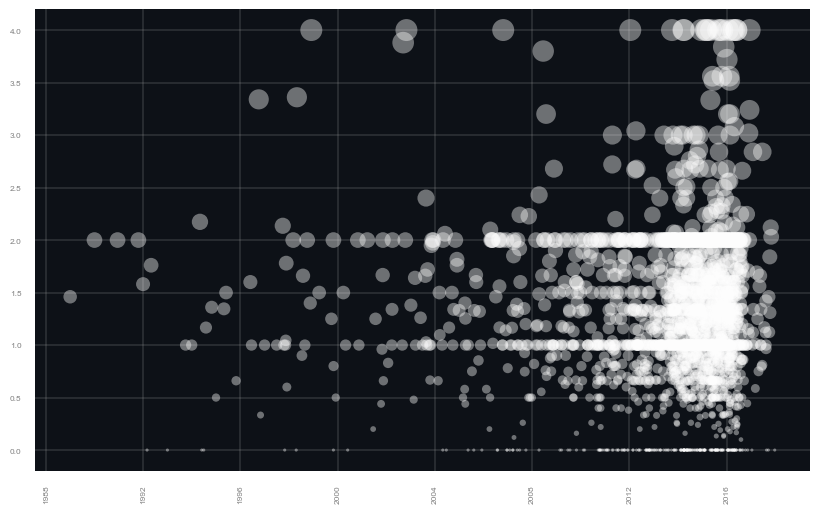

In [11]:
import seaborn as sns

red_color = "#E63946"
back_color = "#0D1117"

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.gca().set_facecolor(back_color)
sns.scatterplot(x='date', y='score', data=steam_games_copy, color="white", size="score", legend=False, edgecolor='none', alpha=0.4, sizes=(5,250))
#sns.scatterplot(x='date', y='price', data=edata_white, color=red_color, size='count', legend=False, edgecolor='none', alpha=0.4, sizes=(5,250))

plt.xlabel('')


plt.ylabel('')
#title = plt.title(f"{price}                ", loc='right')
#title.set_color(red_color)

# Quitar el borde de la grilla en los ejes
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.xticks(rotation=90)
plt.tick_params(axis='x', colors='grey')  
plt.tick_params(axis='y', colors='grey')  
plt.yticks(fontsize=6)
plt.xticks(fontsize=6)

# Cambia el color de la grilla de fondo a gris
ax.grid(color='darkgrey', linewidth=0.25)

# Guardar el gráfico como un archivo JPEG
plt.savefig(f"gallery/scatter_plot.jpg", format='jpg', dpi=300, bbox_inches='tight', facecolor=back_color)

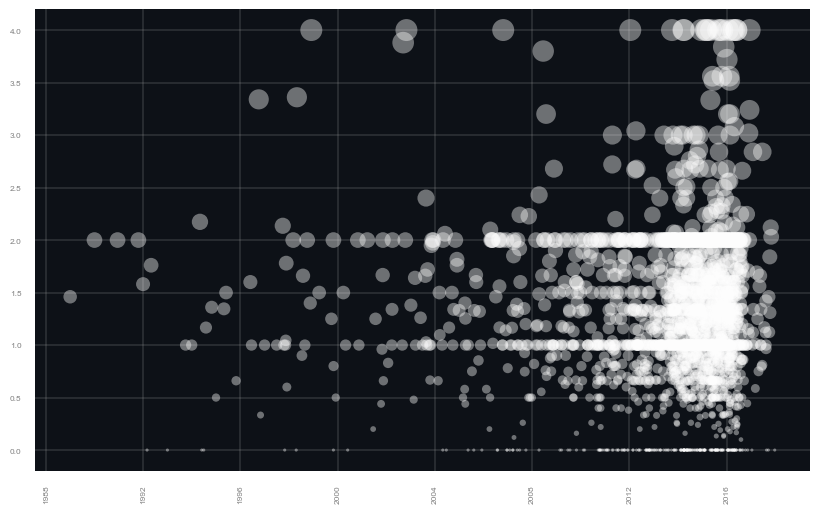

In [12]:
import seaborn as sns

red_color = "#E63946"
back_color = "#0D1117"

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.gca().set_facecolor(back_color)
sns.scatterplot(x='date', y='score', data=steam_games_copy, color="white", size="score", legend=False, edgecolor='none', alpha=0.4, sizes=(5,250))
#sns.scatterplot(x='date', y='price', data=edata_white, color=red_color, size='count', legend=False, edgecolor='none', alpha=0.4, sizes=(5,250))

plt.xlabel('')


plt.ylabel('')
#title = plt.title(f"{price}                ", loc='right')
#title.set_color(red_color)

# Quitar el borde de la grilla en los ejes
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.xticks(rotation=90)
plt.tick_params(axis='x', colors='grey')  
plt.tick_params(axis='y', colors='grey')  
plt.yticks(fontsize=6)
plt.xticks(fontsize=6)

# Cambia el color de la grilla de fondo a gris
ax.grid(color='darkgrey', linewidth=0.25)

# Guardar el gráfico como un archivo JPEG
plt.savefig(f"gallery/scatter_plot.jpg", format='jpg', dpi=300, bbox_inches='tight', facecolor=back_color)

In [13]:
steam_games

,game_id,date,title,price,developer,genres,url,score,playtime_forever,playtime_2weeks,downloads,price_discr
15,327950.0,1989-01-01,Sword of the Samurai,6.99,"MicroProse Software, Inc","[Adventure, Simulation, Retro, Classic, Strategy]",http://store.steampowered.com/app/327950/Sword...,1.460000,5084.0,9.0,54.0,5-10
24,32340.0,1990-01-01,LOOM™,5.99,LucasArts,"[Adventure, Point & Click, Classic, Fantasy, P...",http://store.steampowered.com/app/32340/LOOM/,2.000000,4349.0,0.0,146.0,5-10
31,9180.0,1990-12-14,Commander Keen,4.99,id Software,"[Platformer, Classic, Action, 2D, Retro, 1990'...",http://store.steampowered.com/app/9180/Command...,2.000000,18718.0,41.0,848.0,2-5
44,358260.0,1991-10-23,Crystal Caves,4.99,3D Realms (Apogee Software),"[Action, Classic, Platformer, 1990's]",http://store.steampowered.com/app/358260/Cryst...,2.000000,733.0,0.0,177.0,2-5
49,283920.0,1992-01-01,Putt-Putt® Joins the Parade,6.99,Humongous Entertainment,"[Adventure, Point & Click, Family Friendly, Ca...",http://store.steampowered.com/app/283920/PuttP...,1.580000,2524.0,3.0,116.0,5-10
...,...,...,...,...,...,...,...,...,...,...,...,...
26881,335430.0,2017-10-26,Grimoire: Manastorm,0.00,Omniconnection,"[Action, Indie, Shooter, Free to Play, Multipl...",http://store.steampowered.com/app/335430/Grimo...,2.120000,47572.0,401.0,732.0,NaN
27012,355180.0,2017-10-31,Codename CURE,0.00,Hoobalugalar_X,"[Free to Play, Zombies, Multiplayer, Survival,...",http://store.steampowered.com/app/355180/Coden...,1.094615,305778.0,8385.0,3901.0,NaN
27103,250620.0,2017-11-02,Among the Sleep - Enhanced Edition,16.99,Krillbite Studio,"[Horror, Indie, Adventure, Atmospheric, First-...",http://store.steampowered.com/app/250620/Among...,2.031111,46135.0,138.0,389.0,10-20
28306,285900.0,2017-12-12,Gang Beasts,19.99,Boneloaf,"[Funny, Multiplayer, Fighting, Local Multiplay...",http://store.steampowered.com/app/285900/Gang_...,1.132308,497569.0,14709.0,1476.0,10-20


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting module
import pandas as pd
import numpy as np

labels = ["0-2", "2-5", "5-10", "10-20", "20-30", "30-40", "40-50", "50-100", "100+"]
steam_games_copy["price_discr"].replace("0-2", 0, inplace=True)
steam_games_copy["price_discr"].replace("2-5", 1, inplace=True)
steam_games_copy["price_discr"].replace("5-10", 1, inplace=True)
steam_games_copy["price_discr"].replace("10-20", 2, inplace=True)
steam_games_copy["price_discr"].replace("20-30", 3, inplace=True)
steam_games_copy["price_discr"].replace("30-40", 3, inplace=True)
steam_games_copy["price_discr"].replace("40-50", 3, inplace=True)
steam_games_copy["price_discr"].replace("50-100", 3, inplace=True)
steam_games_copy["price_discr"].replace("100+", 3, inplace=True)

C:\Users\david\AppData\Local\Temp\ipykernel_5472\1099477902.py:39: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_pane_color(back_color)
C:\Users\david\AppData\Local\Temp\ipykernel_5472\1099477902.py:40: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_pane_color(back_color)
C:\Users\david\AppData\Local\Temp\ipykernel_5472\1099477902.py:41: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_pane_color(back_color)
C:\Users\david\AppData\Local\Temp\ipykernel_5472\1099477902.py:51: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.label.set_color('gray')
C:\Users\david\AppData\Local\Temp\ipykernel_547

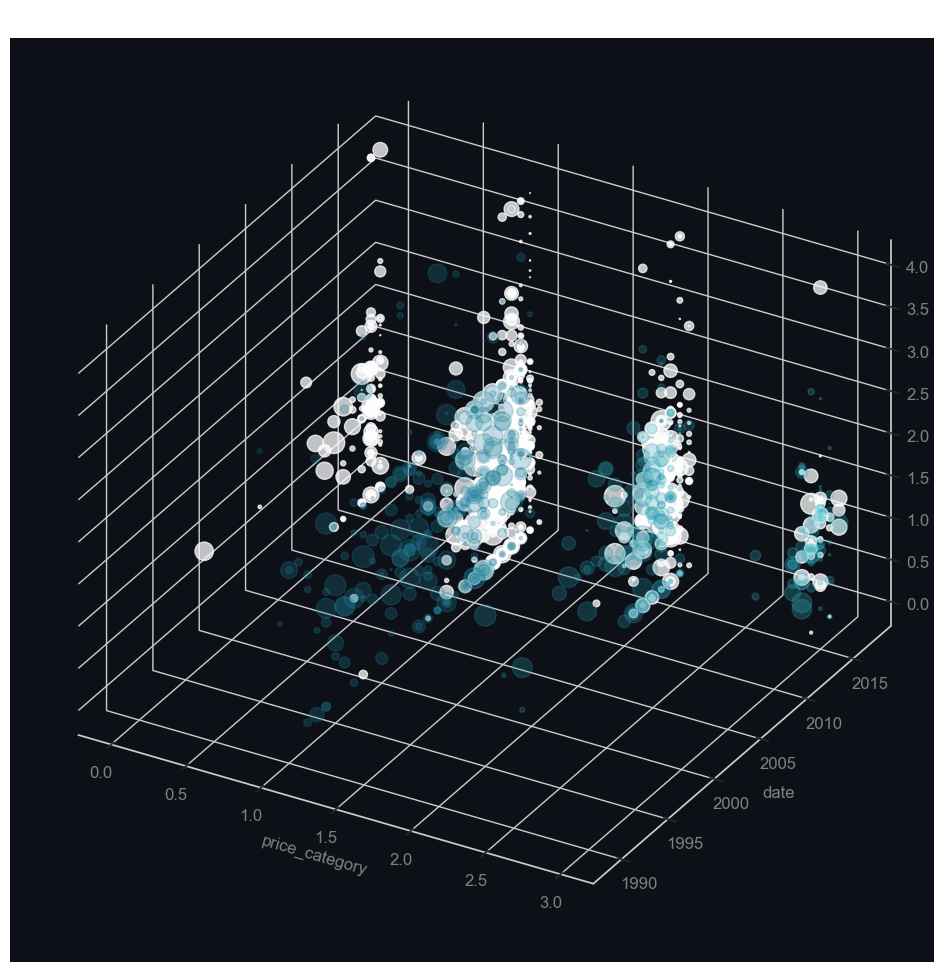

In [15]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

genre = "Indie"

# Prepare specific genre data
genre_x = steam_games_copy["price_discr"][steam_games_copy["genres"].apply(lambda x: genre in x)]
genre_y = steam_games_copy["date"].dt.year[steam_games_copy["genres"].apply(lambda x: genre in x)]
genre_z = steam_games_copy["score"][steam_games_copy["genres"].apply(lambda x: genre in x)]
genre_downloads = steam_games_copy["downloads"][steam_games_copy["genres"].apply(lambda x: genre in x)]
genre_normalized_sizes = 250 * (genre_downloads / max(genre_downloads))

# Prepare all data
all_x = steam_games_copy["price_discr"][~steam_games_copy["genres"].apply(lambda x: genre in x)]
all_y = steam_games_copy['date'].dt.year[~steam_games_copy["genres"].apply(lambda x: genre in x)]
all_z = steam_games_copy["score"][~steam_games_copy["genres"].apply(lambda x: genre in x)]
all_downloads = steam_games_copy["downloads"][~steam_games_copy["genres"].apply(lambda x: genre in x)]
all_normalized_sizes = 250 * (all_downloads / max(all_downloads))

# Prepare color palette
back_color = "#0D1117"
color1 = "#146585"  # Start color
color2 = "#34b9c9"  # End color
all_cmap = LinearSegmentedColormap.from_list('custom_cmap', [color1, color2], N=256)
genre_cmap = LinearSegmentedColormap.from_list('custom_cmap', ["#FFFFFF", "#FFFFFF"], N=256)

# Create a 3D subplot
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d', proj_type='ortho')
ax.set_facecolor(back_color)

ax.set_title(f'{genre.upper()}', fontsize=20, loc='left', color='white')


# Customize the appearance
ax.set_xlabel('price_category')
ax.set_ylabel('date')
ax.set_zlabel('score')
ax.w_xaxis.set_pane_color(back_color)
ax.w_yaxis.set_pane_color(back_color)
ax.w_zaxis.set_pane_color(back_color)
# Configurar el tamaño del texto en los ejes
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.tick_params(axis='z', labelsize=10)
# Configurar el color de las etiquetas de los ejes
ax.tick_params(axis='x', labelcolor='gray')
ax.tick_params(axis='y', labelcolor='gray')
ax.tick_params(axis='z', labelcolor='gray')
# Configurar el color del texto en los ejes
ax.w_xaxis.label.set_color('gray')
ax.w_yaxis.label.set_color('gray')
ax.w_zaxis.label.set_color('gray')
# Configurar el tamaño del texto
ax.w_xaxis.set_tick_params(labelsize=12)  
ax.w_yaxis.set_tick_params(labelsize=12)  
ax.w_zaxis.set_tick_params(labelsize=12)  



# Create a 3D scatterplot with colors based on 'score' values and sizes based on 'downloads'

genre_scatter = ax.scatter(genre_x, genre_y, genre_z, c=genre_x, cmap=genre_cmap, alpha=0.75, s=genre_normalized_sizes)
all_scatter = ax.scatter(all_x, all_y, all_z, c=all_x, cmap=all_cmap, alpha=0.25, s=all_normalized_sizes)

# Save the 3D scatterplot as a file
plt.savefig("gallery/EDA/scatter_3d_plot.jpg", format='jpg', dpi=300, bbox_inches='tight', facecolor=back_color)
plt.show()

### GIF CREATION

In [47]:
# Generate scatter plot for all the genres
genres = pd.read_csv("data/genres.csv", index_col=0)
genres.sort_values("playtime", ascending=False, inplace=True)
top_genres = genres.head(50)

i = 0
for genre in top_genres["genre"]:
    
    try:
        # Prepare specific genre data
        genre_x = steam_games_copy["price_discr"][steam_games_copy["genres"].apply(lambda x: genre in x)]
        genre_y = steam_games_copy["date"].dt.year[steam_games_copy["genres"].apply(lambda x: genre in x)]
        genre_z = steam_games_copy["score"][steam_games_copy["genres"].apply(lambda x: genre in x)]
        genre_downloads = steam_games_copy["downloads"][steam_games_copy["genres"].apply(lambda x: genre in x)]
        genre_normalized_sizes = 250 * (genre_downloads / max(genre_downloads))

        # Prepare all data
        all_x = steam_games_copy["price_discr"][~steam_games_copy["genres"].apply(lambda x: genre in x)]
        all_y = steam_games_copy['date'].dt.year[~steam_games_copy["genres"].apply(lambda x: genre in x)]
        all_z = steam_games_copy["score"][~steam_games_copy["genres"].apply(lambda x: genre in x)]
        all_downloads = steam_games_copy["downloads"][~steam_games_copy["genres"].apply(lambda x: genre in x)]
        all_normalized_sizes = 250 * (all_downloads / max(all_downloads))

        # Prepare color palette
        back_color = "#0D1117"
        color1 = "#146585"  # Start color
        color2 = "#34b9c9"  # End color
        all_cmap = LinearSegmentedColormap.from_list('custom_cmap', [color1, color2], N=256)
        genre_cmap = LinearSegmentedColormap.from_list('custom_cmap', ["#FFFFFF", "#FFFFFF"], N=256)

        # Create a 3D subplot
        fig = plt.figure(figsize=(12, 8))
        ax = fig.add_subplot(111, projection='3d', proj_type='ortho')
        ax.set_facecolor(back_color)

        ax.set_title(f'{genre.upper()}', fontsize=12, loc='left', color='white')


        # Customize the appearance
        ax.set_xlabel('price_category', fontsize=10)
        ax.set_ylabel('date', fontsize=10)
        ax.set_zlabel('score', fontsize=10)
        ax.w_xaxis.set_pane_color(back_color)
        ax.w_yaxis.set_pane_color(back_color)
        ax.w_zaxis.set_pane_color(back_color)
        # Configurar el tamaño y color del texto en los ejes
        ax.tick_params(axis='x', labelcolor='gray', labelsize=8)
        ax.tick_params(axis='y', labelcolor='gray', labelsize=8)
        ax.tick_params(axis='z', labelcolor='gray', labelsize=8)
        # Configurar el color del texto en los ejes
        ax.w_xaxis.label.set_color('gray')
        ax.w_yaxis.label.set_color('gray')
        ax.w_zaxis.label.set_color('gray')
        # Configurar el tamaño del texto
        ax.w_xaxis.set_tick_params(labelsize=8)  
        ax.w_yaxis.set_tick_params(labelsize=8)  
        ax.w_zaxis.set_tick_params(labelsize=8)  



        # Create a 3D scatterplot with colors based on 'score' values and sizes based on 'downloads'

        genre_scatter = ax.scatter(genre_x, genre_y, genre_z, c=genre_x, cmap=genre_cmap, alpha=0.75, s=genre_normalized_sizes)
        all_scatter = ax.scatter(all_x, all_y, all_z, c=all_x, cmap=all_cmap, alpha=0.25, s=all_normalized_sizes)

        # Guardar el gráfico como un archivo JPEG
        plt.savefig(f"gallery/EDA/gif/{i}_scatter_plot_{genre}.jpg", format='jpg', dpi=150, bbox_inches='tight', facecolor=back_color)
        plt.close()
    except:
        pass
    
    i += 1

C:\Users\david\AppData\Local\Temp\ipykernel_5472\393855049.py:43: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_pane_color(back_color)
C:\Users\david\AppData\Local\Temp\ipykernel_5472\393855049.py:44: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_pane_color(back_color)
C:\Users\david\AppData\Local\Temp\ipykernel_5472\393855049.py:45: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_pane_color(back_color)
C:\Users\david\AppData\Local\Temp\ipykernel_5472\393855049.py:51: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.label.set_color('gray')
C:\Users\david\AppData\Local\Temp\ipykernel_5472\39

In [48]:
from PIL import Image, ImageOps
import os

# Directorio donde se encuentran las imágenes originales
directory = 'gallery/EDA/gif/'
# Directorio donde se guardarán las imágenes con espacio a los lados
output_directory = 'gallery/EDA/gif/'
# Crea el directorio de salida si no existe
os.makedirs(output_directory, exist_ok=True)
# Lista de nombres de archivo de las imágenes originales
image_files = [f for f in os.listdir(directory) if f.endswith('.jpg')]
# Ordena los nombres de archivo alfabéticamente para mantener el orden en el GIF
image_files.sort()
# Espacio que deseas agregar a los lados de la imagen (en píxeles)
side_padding = 150
# Espacio que deseas agregar en la parte superior e inferior de la imagen (en píxeles)
vertical_padding = 60
# Color de fondo que deseas para el espacio (en formato RGB)
space_color = (13, 17, 23)  # RGB correspondiente a #0D1117
# Lista para almacenar los objetos Image con espacio a los lados
images_with_space = []

# Procesa cada imagen
for filename in image_files:
    img = Image.open(os.path.join(directory, filename))
    # Calcula las dimensiones de la nueva imagen
    new_width = img.width + 2 * side_padding
    new_height = img.height + 2 * vertical_padding
    # Crea una nueva imagen con espacio y el color de fondo
    new_img = Image.new('RGB', (new_width, new_height), space_color)
    # Pega la imagen original en el centro de la nueva imagen
    position = ((new_width - img.width) // 2, vertical_padding)
    new_img.paste(img, position)
    # Guarda la nueva imagen en el directorio de salida
    output_filename = os.path.join(output_directory, filename)
    new_img.save(output_filename)
    # Agrega la nueva imagen a la lista
    images_with_space.append(new_img)

# Guarda el GIF
output_gif = 'gallery/EDA/eda_gif.gif'
images_with_space[0].save(output_gif, save_all=True, append_images=images_with_space[1:], duration=200, loop=0)

# Borra las imágenes
for filename in image_files:
    os.remove(os.path.join(directory, filename))
